AIM:- Load the “iris” dataset and perform k-nearest neighbour classification. Plot the accuracy/error w.r.t. different K-values.
Compare the accuracy with built-in function of KNN.

In [9]:
import pandas as pd
import numpy as np
import operator

In [10]:
# Collecting iris dataset
df = pd.read_csv("..//Iris.csv")
# Display the first few rows of the dataset to inspect its structure and content.
print("First 5 rows of iris dataset are:-\n", df.head())

First 5 rows of iris dataset are:-
    SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0            5.1           3.5            1.4           0.2  Iris-setosa
1            4.9           3.0            1.4           0.2  Iris-setosa
2            4.7           3.2            1.3           0.2  Iris-setosa
3            4.6           3.1            1.5           0.2  Iris-setosa
4            5.0           3.6            1.4           0.2  Iris-setosa


In [11]:
# Check the dimensions of the dataset (number of rows and columns).
row, col = df.shape
print("No. of rows in the dataset: ", row)
print("No. of column in the dataset: ", col)

No. of rows in the dataset:  150
No. of column in the dataset:  5


In [12]:
# Identify the data types of each column (numeric, categorical, text, etc.).
print("Data types of each column:\n", df.dtypes)

Data types of each column:
 SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object


In [13]:
# Preprocess the data to handle missing values
# Display the number of missing values in each column
missingValues = df.isnull().sum()
print("Missing values per column:-")
print(missingValues)

Missing values per column:-
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


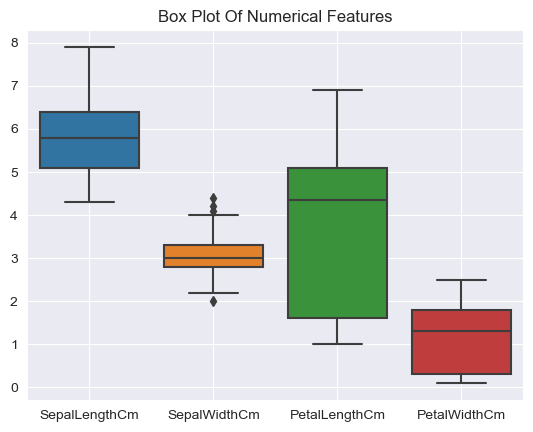

In [14]:
# Visualize the dataset and existence of outliers with boxplot
# importing required libraries
import matplotlib.pyplot as plt
import seaborn as sns
# Defining numerical features
numerical_columns = df.select_dtypes(include=['float64']).columns
sns.boxplot(data=df[numerical_columns])
plt.title("Box Plot Of Numerical Features")
plt.grid(True)
plt.show()

In [15]:
print("From Box Plot, We see that the SepalWidthCm column have some outliers but that will not impact as such so,\nwe can conclude that the provided iris dataset contains no outliers. ")

From Box Plot, We see that the SepalWidthCm column have some outliers but that will not impact as such so,
we can conclude that the provided iris dataset contains no outliers. 


In [16]:
# Finding Unique categories of species column
print("Types of Species: ", df['Species'].unique())

Types of Species:  ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [17]:
# Mapping Categorical column with float64 values
df['Species'] = df['Species'].map({'Iris-setosa': -1.0, 'Iris-versicolor': 0.0, 'Iris-virginica': 1.0})

In [18]:
# Features and target variable selection
X = df.drop(columns=['Species'])  # Features
Y = df['Species']  # Target Variable

In [19]:
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [20]:
Y.head()

0   -1.0
1   -1.0
2   -1.0
3   -1.0
4   -1.0
Name: Species, dtype: float64

In [21]:
from sklearn.model_selection import train_test_split
# Split the dataset into training and testing sets(80% training, 20%testing)
# Shuffle the data to avoid bias
development_set, test_set = train_test_split(df, test_size=0.2, shuffle=True, random_state=0)
# Display the size of the training and testing sets
print(f'Training set size: {development_set.shape[0]} samples \nTest set size: {test_set.shape[0]} samples')

Training set size: 120 samples 
Test set size: 30 samples


The HyperParameters tuned are:
Distance Metrics: Euclidean, Normalized Euclidean and Cosine Similarity

In [22]:
# Compute the mean and standard deviation for normalized Euclidean distance.
mean_development_set = development_set.mean()
mean_test_set = test_set.mean()
std_development_set = development_set.std()
std_test_set = test_set.std()

# Retrieve the 'Species' column and store it in separate lists.
dev_species = list(development_set.iloc[:,-1])
test_species = list(test_set.iloc[:,-1])

In [23]:
# Define functions to compute the value of the distance metrics.

def euclideanDistance(data_1, data_2, data_len):
    dist = 0
    for i in range(data_len):
        dist = dist + np.square(data_1[i] - data_2[i])
    return np.sqrt(dist)

def normalizedEuclideanDistance(data_1, data_2, data_len, data_mean, data_std):
    n_dist = 0
    for i in range(data_len):
        n_dist = n_dist + (np.square(((data_1[i] - data_mean[i])/data_std[i]) - ((data_2[i] - data_mean[i])/data_std[i])))
    return np.sqrt(n_dist)

def cosineSimilarity(data_1, data_2):
    dot = np.dot(data_1, data_2[:-1])
    norm_data_1 = np.linalg.norm(data_1)
    norm_data_2 = np.linalg.norm(data_2[:-1])
    cos = dot / (norm_data_1 * norm_data_2)
    return 1-cos

In [24]:
def knn(dataset, testInstance, k, dist_method, dataset_mean, dataset_std):
    distances = {}
    length = testInstance.shape[1]
    if dist_method == 'euclidean':
        for x in range(len(dataset)):
            dist_up = euclideanDistance(testInstance, dataset.iloc[x], length)
            distances[x] = dist_up[0]
    elif dist_method == 'normalized_euclidean':
        for x in range(len(dataset)):
            dist_up = normalizedEuclideanDistance(testInstance, dataset.iloc[x], length, dataset_mean, dataset_std)
            distances[x] = dist_up[0]
    elif dist_method == 'cosine':
        for x in range(len(dataset)):
            dist_up = cosineSimilarity(testInstance, dataset.iloc[x])
            distances[x] = dist_up[0]
    # Sort values based on distance
    sort_distances = sorted(distances.items(), key=operator.itemgetter(1))
    neighbours = []
    # Extracting nearest k neighbors
    for x in range(k):
        neighbours.append(sort_distances[x][0])
    # Initializing counts for 'Species' labels counts as 0
    counts = {"Iris-setosa" : 0, "Iris-versicolor" : 0, "Iris-virginica" : 0}
    # Computing the most frequent Species class
    for x in range(len(neighbours)):
        response = dataset.iloc[neighbours[x]][-1]
        if response in counts:
            counts[response] += 1
        else:
            counts[response] = 1
    # Sorting the Species class in reverse order to get the most frequent class
    sort_counts = sorted(counts.items(), key=operator.itemgetter(1), reverse=True)
    return sort_counts[0][0]

In [25]:
# Compute the class for each k value and each distance metric.
# Creating a list of list of all columns except 'Species' by iterating through the development set
row_list = []
for index, rows in development_set.iterrows():
    my_list = [rows.SepalLengthCm, rows.SepalWidthCm, rows.PetalLengthCm, rows.PetalWidthCm]
    row_list.append([my_list])
# k values for the number of neighbours that need to be considered
k_n = [1, 3, 5, 7]
# Distance metrics
distance_methods = ['euclidean', 'normalized_euclidean', 'cosine']
# Performing KNN on the development set by iterating all the development set data points and for each distance metric and
# number of neighbors (k), predicting the class of the data point based on the most frequent class among its k-nearest neighbors.
observed_k = {}
for dist_method in distance_methods:
    development_set_observed_k = {}
    for k in k_n:
        development_set_obs = []
        for i in range(len(row_list)):
            development_set_obs.append(knn(development_set, pd.DataFrame(row_list[i]), k, dist_method, mean_development_set, std_development_set))
        development_set_observed_k[k] = development_set_obs
    # Nested Dictionary containing the observed class for each value of k (number of neighbors) and each distance metric.
    # The structure is as follows:
    # observed_k = {dist_metric_1: {k1: [obs_class1, obs_class2, ...], k2: [...], ...},
    #          dist_metric_2: {k1: [...], k2: [...], ...},
    #          ...}
    observed_k[dist_method] = development_set_observed_k
print(observed_k)

{'euclidean': {1: [1.0, 0.0, -1.0, 1.0, 1.0, 0.0, -1.0, 0.0, 0.0, 0.0, 1.0, -1.0, 1.0, -1.0, -1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, -1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, -1.0, -1.0, 1.0, 0.0, -1.0, -1.0, 0.0, -1.0, 1.0, 0.0, -1.0, 0.0, 1.0, 0.0, -1.0, 1.0, 1.0, 1.0, 1.0, -1.0, -1.0, 1.0, 1.0, -1.0, 1.0, -1.0, 1.0, 1.0, -1.0, -1.0, 1.0, -1.0, -1.0, -1.0, 0.0, 1.0, 1.0, -1.0, -1.0, -1.0, 0.0, 0.0, -1.0, -1.0, 0.0, -1.0, 1.0, 0.0, 1.0, 0.0, -1.0, 1.0, -1.0, 1.0, -1.0, -1.0, 1.0, -1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, -1.0, 0.0, 1.0, 1.0, -1.0, 0.0, 0.0, 0.0, 0.0, -1.0, -1.0, -1.0, 1.0, 0.0, 1.0, -1.0], 3: [1.0, 0.0, -1.0, 1.0, 1.0, 0.0, -1.0, 1.0, 0.0, 0.0, 1.0, -1.0, 1.0, -1.0, -1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, -1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, -1.0, -1.0, 1.0, 0.0, -1.0, -1.0, 0.0, -1.0, 1.0, 0.0, -1.0, 0.0, 1.0, 0.0, -1.0, 1.0, 1.0, 1.0, 1.0, -1.0, -1.0, 1.0, 1.0, -1.0, 1.0, -1.0, 

In [26]:
# Calculating the accuracy of the development set by comparing it with the development set 'Species'
accuracy = {}
for key in observed_k.keys():
    accuracy[key] = {}
    for k_value in observed_k[key].keys():
        # print('k = ', key)
        count = 0
        for i,j in zip(dev_species, observed_k[key][k_value]):
            if i == j:
                count += 1
            else:
                pass
        accuracy[key][k_value] = count/(len(dev_species))
        
# Storing the accuracy for each k and each distance metric into a dataframe
df_result = pd.DataFrame({'k': k_n})
for key in accuracy.keys():
    value = list(accuracy[key].values())
    df_result[key] = value
print(df_result)

   k  euclidean  normalized_euclidean    cosine
0  1   1.000000              1.000000  1.000000
1  3   0.950000              0.966667  0.983333
2  5   0.950000              0.958333  0.966667
3  7   0.966667              0.966667  0.966667


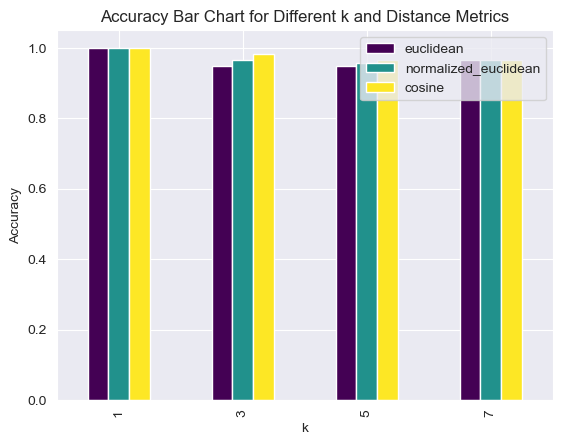

In [27]:
# Plotting Bar chart for accuracy
draw = df_result.plot(x='k', y=['euclidean', 'normalized_euclidean', 'cosine'], kind='bar', colormap='viridis')
draw.set(ylabel= 'Accuracy')
plt.title('Accuracy Bar Chart for Different k and Distance Metrics')
plt.show()

In [28]:
# Ignoring k=1 if the value of accuracy for k=1 is 100%,
# Since this mostly implies overfitting. Replace it with the value of numpy.nan
df_result.loc[df_result['k'] == 1.0, ['euclidean', 'normalized_euclidean', 'cosine']] = np.nan

In [29]:
# Find the optimal hyperParameters
# In case the accuracy is the same for different k and different distance metric and first occurrence of
# the maximum accuracy as the optimal combination. 
column_val = [c for c in df_result.columns if not c.startswith('k')]
col_max = df_result[column_val].max().idxmax(0)
best_dist_method = col_max
row_max = df_result[col_max].argmax()
best_k = int(df_result.iloc[row_max]['k'])
if df_result.isnull().values.any():
    print("Best k value is\033[1m", best_k, "\033[0mand best distance metric is\033[1m", best_dist_method, 
          "\nIgnoring k=1 if the value of accuracy for k=1 is 100%, since this mostly implies overfitting.")
else:
    print("\n\n\nBest k value is\033[1m", best_k, "\033[0mand best distance metric is\033[1m", best_dist_method,
          "\nIgnoring k=1 if the value of accuracy for k=1 is 100%, since this mostly implies overfitting.")

Best k value is 3 and best distance metric is cosine 
Ignoring k=1 if the value of accuracy for k=1 is 100%, since this mostly implies overfitting.


In [30]:
# Compute the final accuracy.
# Initialize empty lists to store accuracy values
custom_accuracies = []
# Creating a list of list of all columns except 'Species' by iterating through the test set
# Iterate over k values
for k in k_n:
    row_list_test = []
    for index, rows in test_set.iterrows():
        my_list = [rows.SepalLengthCm, rows.SepalWidthCm, rows.PetalLengthCm, rows.PetalWidthCm]
        row_list_test.append([my_list])
    test_set_obs = []
    for i in range(len(row_list_test)):
        test_set_obs.append(knn(test_set, pd.DataFrame(row_list_test[i]), k, best_dist_method, mean_test_set, std_test_set))
    # print(test_set_obs)
    count = 0
    for i,j in zip(test_species, test_set_obs):
        if i == j:
            count += 1
        else:
            pass
    custom_accuracy = count/(len(test_species))
    custom_accuracies.append(custom_accuracy)
    print(f"Final Accuracy of the Custom Test Dataset for k={k}: ", custom_accuracy)

Final Accuracy of the Custom Test Dataset for k=1:  1.0
Final Accuracy of the Custom Test Dataset for k=3:  0.9666666666666667
Final Accuracy of the Custom Test Dataset for k=5:  0.9333333333333333
Final Accuracy of the Custom Test Dataset for k=7:  0.9666666666666667


In [31]:
# Importing necessary libraries 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
sklearn_knn_accuracies = []
# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=True, random_state=0)
# Convert pandas DataFrames to NumPy arrays
X_train_np = X_train.to_numpy()
X_test_np = X_test.to_numpy()
# Define the built-in KNN implementation
for k in k_n:
    sklearn_knn_model = KNeighborsClassifier(n_neighbors=k, metric='cosine')
    # Train the built-in KNN model
    sklearn_knn_model.fit(X_train_np, y_train)
    # Make predictions on the test set
    sklearn_knn_predictions = sklearn_knn_model.predict(X_test_np)
    # Calculate the accuracy of the model
    sklearn_knn_accuracy = accuracy_score(sklearn_knn_predictions, y_test)
    sklearn_knn_accuracies.append(sklearn_knn_accuracy)
    print(f"In Built KNN Classifier Accuracy for k={k}: ", sklearn_knn_accuracy)

In Built KNN Classifier Accuracy for k=1:  1.0
In Built KNN Classifier Accuracy for k=3:  0.9666666666666667
In Built KNN Classifier Accuracy for k=5:  1.0
In Built KNN Classifier Accuracy for k=7:  0.9666666666666667


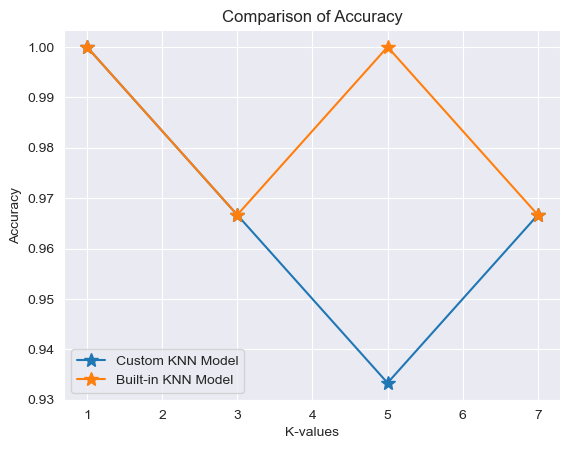

In [32]:
# Plotting the comparison
plt.plot(k_n, custom_accuracies, label='Custom KNN Model', marker='*', markersize=10)
plt.plot(k_n, sklearn_knn_accuracies, label='Built-in KNN Model', marker='*', markersize=10)
plt.title('Comparison of Accuracy')
plt.xlabel('K-values')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [33]:
print("Since, the accuracy value of both Custom and Built-in KNN Classifiers is SAME (0.9666666666666667)\nso, In graph it is superimposed.")

Since, the accuracy value of both Custom and Built-in KNN Classifiers is SAME (0.9666666666666667)
so, In graph it is superimposed.
